In [1]:
import pandas as pd
import numpy as np
import datetime as dt # so that pandas can recognize dates properly
import matplotlib.pyplot as plt # for visualization
from matplotlib import style
import pandas_datareader.data as web # to collect data

In [2]:
style.use('ggplot')
tickers = ['VOO', 'RDBX', 'SIGA']
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 12, 31)

In [3]:
returns = pd.DataFrame()
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0
weights = 0
annualized_return = 0

In [4]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer') 
returns

,VOO,RDBX,SIGA
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.005949,NaN,0.006250
2018-01-04,0.004385,NaN,0.024845
2018-01-05,0.006409,NaN,0.004040
2018-01-08,0.002070,NaN,-0.024145
...,...,...,...
2021-12-27,0.014261,0.006274,0.003755
2021-12-28,-0.000752,-0.013716,-0.048629
2021-12-29,0.001209,-0.045512,-0.009174


In [5]:
number_of_portfolios = 50000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

In [6]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)

In [7]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]

In [8]:
portfolio_df = pd.DataFrame(portfolio_metrics)
portfolio_df = portfolio_df.T

In [9]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.064702,0.569631,0.113585,"[0.223, 0.71, 0.067]"
1,0.108959,0.455989,0.238951,"[0.076, 0.512, 0.413]"
2,0.142829,0.333527,0.428237,"[0.277, 0.312, 0.412]"
3,0.123558,0.386061,0.320049,"[0.213, 0.416, 0.37]"
4,0.094545,0.466534,0.202655,"[0.221, 0.561, 0.218]"
...,...,...,...,...
49995,0.103633,0.455291,0.22762,"[0.139, 0.528, 0.333]"
49996,0.166772,0.265873,0.627263,"[0.449, 0.165, 0.386]"
49997,0.071471,0.532638,0.134182,"[0.316, 0.662, 0.022]"
49998,0.173087,0.258586,0.669361,"[0.478, 0.129, 0.393]"


In [10]:
min_risk_portfolio = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
max_return_portfolio = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
max_sharpe_portfolio = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]

In [11]:
print('Minimum Risk Portfolio')
print(min_risk_portfolio)
print(tickers)
print('')

print('Maximum Return Portfolio')
print(max_return_portfolio)
print(tickers)
print('')

print('Maximum Sharpe Ratio Portfolio')
print(max_sharpe_portfolio)
print(tickers)
print('')

Minimum Risk Portfolio
Return                  0.176455
Risk                    0.204934
Sharpe                  0.861032
Weights    [0.893, 0.048, 0.058]
Name: 6855, dtype: object
['VOO', 'RDBX', 'SIGA']

Maximum Return Portfolio
Return                  0.213135
Risk                    0.451854
Sharpe                  0.471691
Weights    [0.002, 0.001, 0.997]
Name: 42056, dtype: object
['VOO', 'RDBX', 'SIGA']

Maximum Sharpe Ratio Portfolio
Return                0.185928
Risk                  0.210737
Sharpe                0.882276
Weights    [0.904, 0.0, 0.096]
Name: 4348, dtype: object
['VOO', 'RDBX', 'SIGA']



C:\Users\AITZAZ~1\AppData\Local\Temp/ipykernel_21872/3179639514.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = 'Sharpe Ratio')


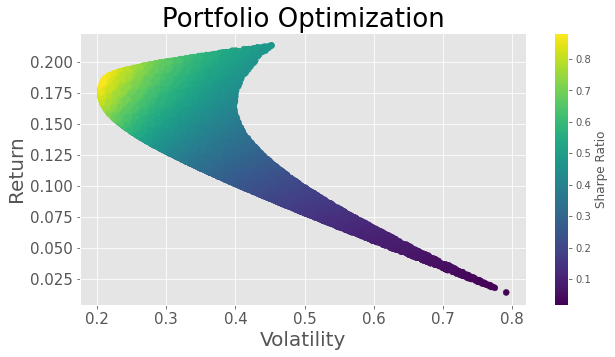

In [12]:
plt.figure(figsize = (10, 5))
plt.scatter(portfolio_risk, portfolio_return, c = portfolio_return / portfolio_risk) # c for colorbar based on sharpe.

plt.title('Portfolio Optimization', fontsize = 26)

plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.colorbar(label = 'Sharpe Ratio')

plt.show()